In [1]:
!pip install --upgrade langchain langchain-community langgraph  openai langchain_openai

In [2]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START
from langchain_openai import ChatOpenAI
import requests
from langchain_core.messages import SystemMessage, HumanMessage
from langgraph.graph import MessagesState

from langgraph.prebuilt import ToolNode, tools_condition

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

In [3]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [4]:
!pip install -U duckduckgo-search

In [5]:
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()
search.invoke("Obama's first name?")

"The Irish Sun, It's a fake Barack Obama's brother posts forged document he claims is ex-president's 'Kenyan birth certificate,' March 11, 2017 Salon, Orly Taitz is at it again , Sept. 4, 2009 The White House, official residence of the president of the United States, in July 2008. The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] Under the U.S. Constitution, the officeholder leads the executive branch of the federal government and is the commander-in-chief of ... Born on August 4, 1961, in Honolulu, Hawaii, Obama is the first president born outside the continental United States. His full name is Barack Hussein Obama II, named after his father. Obama's mother, Ann Dunham, was from Kansas, while his father, Barack Obama Sr., hailed from Kenya. Here is a list of the presidents and vice presidents of the United States along with their parties and dates in office. ...

In [6]:
from langchain_community.tools import DuckDuckGoSearchRun

def search_duckduckgo(query: str):
    """Searches DuckDuckGo using LangChain's DuckDuckGoSearchRun tool."""
    search = DuckDuckGoSearchRun()
    return search.invoke(query)

# Example usage
result = search_duckduckgo("what are AI agent")
print(result)

AI agents use feedback mechanisms, such as other AI agents and human-in-the-loop (HITL), to improve the accuracy of their responses. Let's return to our previous surfing example to highlight this. After the agent forms its response to the user, the agent stores the learned information along with the user's feedback to improve performance ... In this article. Azure AI Agent Service is a fully managed service designed to empower developers to securely build, deploy, and scale high-quality, and extensible AI agents without needing to manage the underlying compute and storage resources. What originally took hundreds of lines of code to support client side function calling can now be done in just a few lines of code with Azure AI Agent ... AI Agents in Healthcare and Finance . Healthcare: Babylon Health uses AI agents to provide initial symptom diagnoses, suggest possible conditions, and connect patients with medical professionals in real-time. This not only speeds up the process of seeking

In [7]:
def multiply(a:int,b:int) -> int:
    """
    Multiply a and b
    """
    return a* b

def add(a:int,b:int) -> int:
    """
    Adds a and b
    """
    return a + b

In [8]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(temperature=0, api_key='sk-proj-************************QHrtvM7', model="gpt-4o-mini")


In [9]:
llm.invoke('hello').content

'Hello! How can I assist you today?'

In [10]:
tools = [search_duckduckgo, add, multiply]

llm_with_tools = llm.bind_tools(tools)

In [11]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}



In [14]:
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder = StateGraph(State)

# Define nodes
graph_builder.add_node("assistant",chatbot)
graph_builder.add_node("tools",ToolNode(tools))

#define edges
graph_builder.add_edge(START,"assistant")
graph_builder.add_conditional_edges("assistant",tools_condition)
graph_builder.add_edge("tools","assistant")

react_graph=graph_builder.compile()

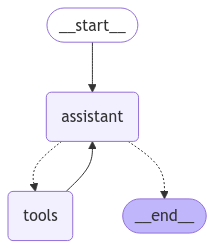

In [13]:
# To see the graph’s connection visually

display(Image(react_graph.get_graph().draw_mermaid_png()))

In [15]:
response = react_graph.invoke({"messages": [HumanMessage(content="what is the weather in delhi. Multiply it by 2 and add 5.")]})
print(response["messages"])

[HumanMessage(content='what is the weather in delhi. Multiply it by 2 and add 5.', additional_kwargs={}, response_metadata={}, id='93dac111-0fcc-43df-a776-63f2ed10bbc1'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_UE8iSp1kzj5jwRaSvvuJOPne', 'function': {'arguments': '{"query":"current weather in Delhi"}', 'name': 'search_duckduckgo'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 117, 'total_tokens': 138, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-c35cf1e8-c380-44f8-bb90-fdd28f4bf9ec-0', tool_calls=[{'name': 'search_duckduckgo', 'args': {'query': 'current weather in Delhi'}, 'id': 'call_UE8iSp1kz